# Load data

In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
target_field = 'target'
treatment_field = 'treatment'

In [3]:
train = pd.read_parquet('data/train.parquet')
valid = pd.read_parquet('data/valid.parquet')
test = pd.read_parquet('data/test.parquet')

In [4]:
# from sklearn.model_selection import train_test_split
# from sklift.datasets import fetch_lenta
# lenta_dataset = fetch_lenta()
# df = lenta_dataset.data
# df[target_field] = lenta_dataset[target_field]
# df[treatment_field] = lenta_dataset[treatment_field].map({'test': 1, 'control': 0})
# train, test = train_test_split(df, stratify=df[[treatment_field, target_field]])
# train, valid = train_test_split(train, stratify=train[[treatment_field, target_field]])
# train.to_parquet('data/train.parquet')
# valid.to_parquet('data/valid.parquet')
# test.to_parquet('data/test.parquet')

# Create dataset

In [5]:
from modules.data import Dataset

In [10]:
dataset = Dataset(
    train = train,
    valid = valid,
    test = test,
    
    treatment_field = treatment_field,
    target_field = target_field, 
    show_stats=True
)

 Num features:  192 / 193 ['age', 'cheque_count_12m_g20', 'cheque_count_12m_g21', 'cheque_count_12m_g25', 'cheque_count_12m_g32', 'cheque_count_12m_g33', 'cheque_count_12m_g38', 'cheque_count_12m_g39', 'cheque_count_12m_g41', 'cheque_count_12m_g42'], ...]
 Cat features:  1 / 193 ['gender']

train stats

,n obs,% of population,mean target
treatment,,,
0,96264,24.909627,0.102582
1,290189,75.090373,0.110125


valid stats

,n obs,% of population,mean target
treatment,,,
0,32088,24.909562,0.102562
1,96730,75.090438,0.110131


test stats

,n obs,% of population,mean target
treatment,,,
0,42785,24.910048,0.102583
1,128973,75.089952,0.110124


# Feature filtering

In [7]:
from modules.data import delete_constant_features
delete_constant_features(dataset)

0 features were removed.
The remaining number of factors is 193


In [8]:
from modules.data import delete_nan_features
delete_nan_features(dataset)

0 features were removed.
The remaining number of factors is 193


In [9]:
from modules.data import delete_high_cardinality_cat_features
delete_high_cardinality_cat_features(dataset, mean_unique_values=0.05)

0 features were removed.
The remaining number of factors is 193


In [10]:
from modules.data import delete_duplicated_features
delete_duplicated_features(dataset)

193it [00:32,  5.90it/s]

0 features were removed.
The remaining number of factors is 193


In [7]:
from modules.data import delete_high_corr_features
delete_high_corr_features(dataset)

5 features were removed.
The remaining number of factors is 188


# Adversarial validation

In [15]:
from modules.data import adversarial_tg_cg

4it [00:51, 12.96s/it]

ROC-AUC in valid TG/CG: 0.5476


<AxesSubplot: title={'center': 'Adversarial feature importance'}>

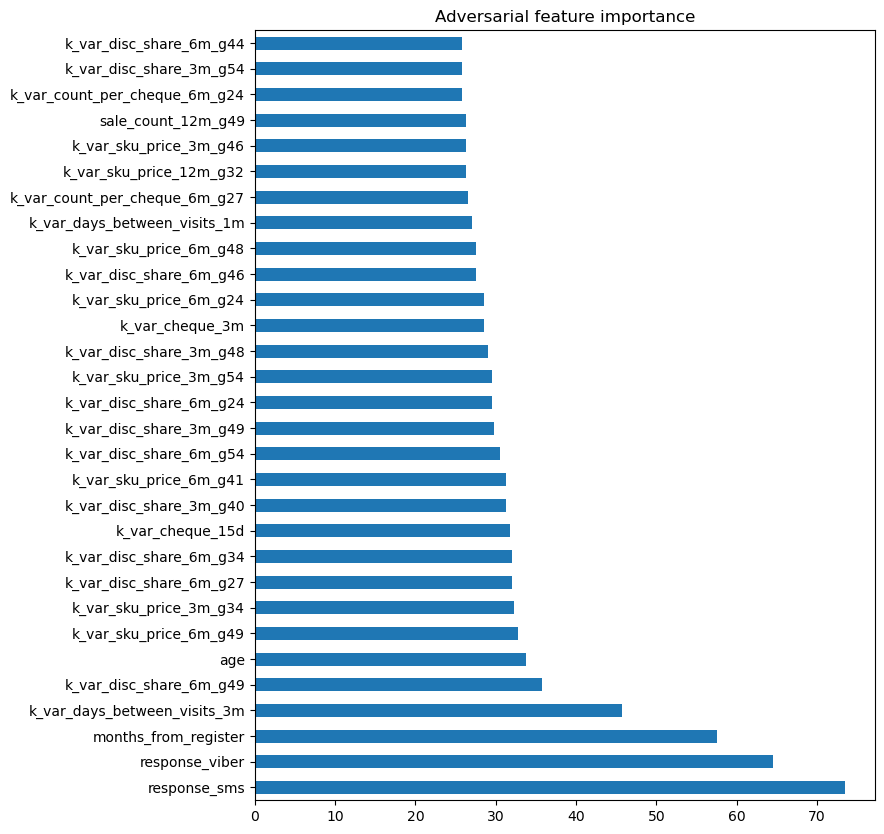

None

In [16]:
adversarial_tg_cg(dataset, 'valid')